In [1]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

In [2]:
def SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = S0 + I0 + R0
        else:
            dS_dt = (-beta * S[idx-1] * I[idx-1] / N[idx-1]) + (mu_birth * N[idx-1]) - (mu_death * S[idx-1])
            dI_dt = (beta * S[idx-1] * I[idx-1] / N[idx-1]) - gamma * I[idx-1] - (mu_death * I[idx-1])
            dR_dt = (gamma * I[idx-1]) - (mu_death * R[idx-1])
            dN_dt = (mu_birth * N[idx-1]) - (mu_death * N[idx-1])
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = N[idx-1] + dN_dt * stepsize

    
    return S, I, R, N, T

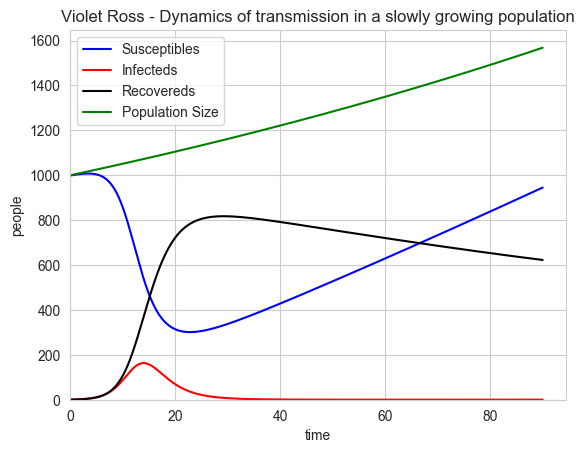

In [3]:
# SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize)
sns.set_style("whitegrid")

S,I,R,N,T = SIR(999, 1, 0, 1, 0.5, 0.01, 0.005, 90, 0.05)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.plot(T,N, color='g', label='Population Size')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.title("Violet Ross - Dynamics of transmission in a slowly growing population")

fig.savefig('p1.png', dpi=300, bbox_inches = "tight")

# Problem 3

In [3]:
def g(R_0, r_inf_list):
    g = []
    for r_inf in r_inf_list:
        g.append(1 - math.exp(-R_0 * r_inf))
    return g

In [4]:
def func(r_inf):
    f = r_inf - 1 + math.exp(-R_0 * r_inf)
    return(f)

Problem 3 Part b

In [9]:
R_0_vals = [0.9, 1, 1.1, 1.2]  
r_inf_list = np.arange(0, 0.5, 0.01)

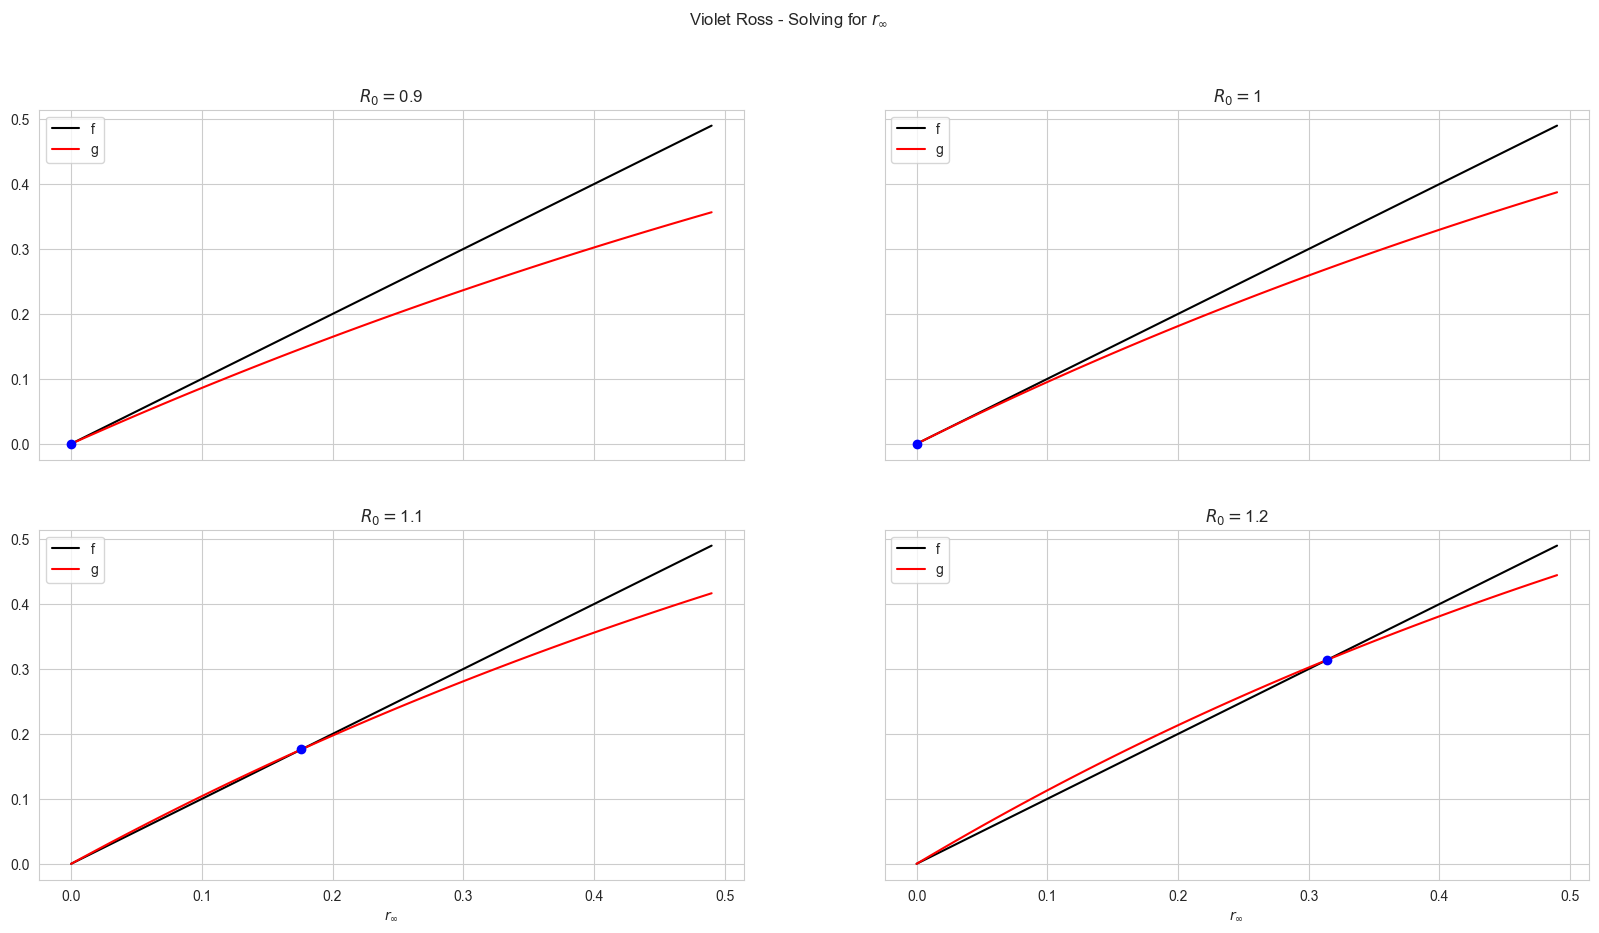

In [10]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(2,2, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(10)

counter = 0
for i in range(2):
    for j in range(2):
        R_0 = R_0_vals[counter]
        g_vals = g(R_0, r_inf_list)
        soln_r = fsolve(func, 1)
        soln_f = 1 - math.exp(-R_0 * soln_r)
        axs[i,j].plot(r_inf_list, r_inf_list, label = "f", color = "black")
        axs[i,j].plot(r_inf_list, g_vals, label = "g", color = "red")
        axs[i, j].scatter(soln_r, soln_f, color = "blue", zorder = 4)
        axs[i,j].set_title(r'$R_0 = $' f'{R_0}' )
        axs[i,j].legend()
        counter += 1

    axs[1, 0].set_xlabel(r'$r_{\infty}$')
    axs[1, 1].set_xlabel(r'$r_{\infty}$')

fig.suptitle("Violet Ross - Solving for $r_{\infty}$")

fig.savefig('p3.png', dpi=300, bbox_inches = "tight")

Problem 3 Part d

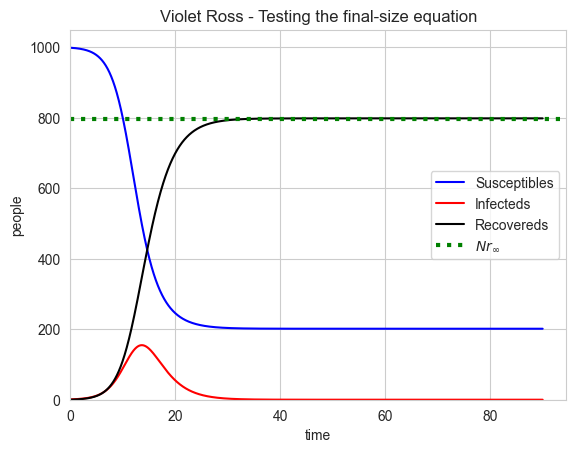

In [11]:
S,I,R,N,T = SIR(999, 1, 0, 1, 0.5, 0, 0, 90, 0.05)
R_0 = 2
soln_r = fsolve(func, 1)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
plt.axhline(y = soln_r * 1000, ls = "dotted", label= r'$N r_{\infty}$', linewidth = 3, color = "green")
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.title("Violet Ross - Testing the final-size equation")
fig.savefig('p3d.png', dpi=300, bbox_inches = "tight")

# Problem 4

In [10]:
SIR_vals = []
for diff in np.arange(-0.4, 0.4, 0.05):
    beta = 1
    gamma = 0.5
    n = 10 ** 6
    thresh = gamma / beta
    epsilon = 1/n
    s = (thresh + diff) * n
    r = n - s
    S,I,R,N,T = SIR(s, epsilon, r, beta, gamma, 0, 0, 10000, 0.05)
    SIR_vals.append([abs(S[10000] - S[0]), abs(I[10000] - I[0]), abs(R[10000] - R[0])])
SIR_vals = np.array(SIR_vals)

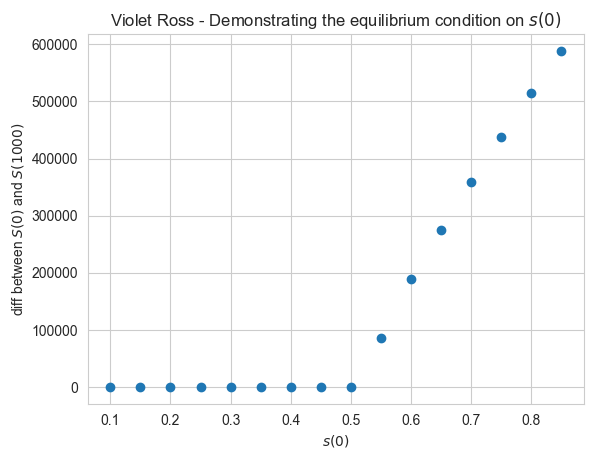

In [11]:
plt.scatter(0.5 + np.arange(-0.4, 0.4, 0.05), SIR_vals[:,0])
plt.xlabel(r'$s(0)$' )
plt.ylabel("diff between " r'$S(0)$' " and " r'$S(1000)$' )
plt.title("Violet Ross - Demonstrating the equilibrium condition on " r'$s(0)$')
plt.savefig('p4.png', dpi=300, bbox_inches = "tight")